<b>¡Hola Daniel!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# Instrucción 1. Descarga y prepara los datos.  Explica el procedimiento.

In [1]:
# Cargar todas las librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
# Importar los datasets

data_region_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_region_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_region_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# Estudiar los datos que contienen

print(data_region_0.info())
print(data_region_1.info())
print(data_region_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

In [4]:
# Asegurarse de que los tipos de datos sean correctos

print(data_region_0.head())
print(data_region_1.head())
print(data_region_2.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [5]:
# Explorar estadística descriptiva

print(data_region_0.describe())
print(data_region_1.describe())
print(data_region_2.describe())

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%       

In [6]:
# Mostrar número de filas y columnas

print(data_region_0.shape)
print(data_region_1.shape)
print(data_region_2.shape)

(100000, 5)
(100000, 5)
(100000, 5)


In [7]:
# Valores ausentes

print(data_region_0.isna().sum())
print(data_region_1.isna().sum())
print(data_region_2.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [8]:
# Valores duplicados

print("Valores duplicados: ", data_region_0.duplicated().sum())
print("Valores duplicados: ", data_region_1.duplicated().sum())
print("Valores duplicados: ", data_region_2.duplicated().sum())

Valores duplicados:  0
Valores duplicados:  0
Valores duplicados:  0


<div class="alert alert-block alert-success">
<b>Celdas [1–8]</b> <a class="tocSkip"></a><br>
Muy bien realizada la carga, exploración y validación de los datos. Verificaste tipos, valores nulos y duplicados, además de analizar estadísticas descriptivas con claridad. Este enfoque garantiza una base limpia para el modelado posterior y muestra comprensión sólida del preprocesamiento.
</div>


**EXPLORACIÓN DE DATOS A PROFUNDIDAD:**

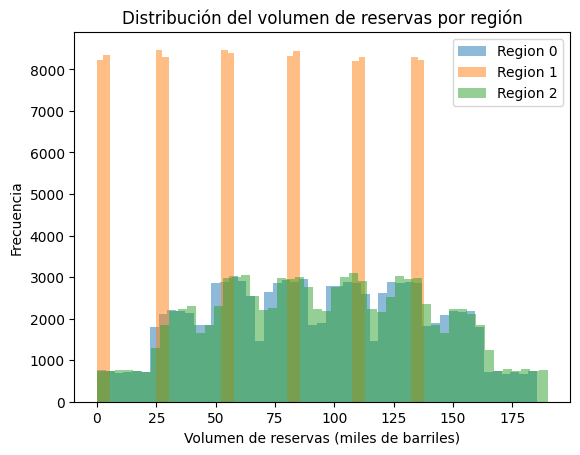

In [9]:
# Visualización de volumen de resevas (product) - Histograma

plt.hist(data_region_0['product'], bins=50, alpha=0.5, label='Region 0')
plt.hist(data_region_1['product'], bins=50, alpha=0.5, label='Region 1')
plt.hist(data_region_2['product'], bins=50, alpha=0.5, label='Region 2')

plt.legend()
plt.xlabel('Volumen de reservas (miles de barriles)')
plt.ylabel('Frecuencia')
plt.title('Distribución del volumen de reservas por región')
plt.show()

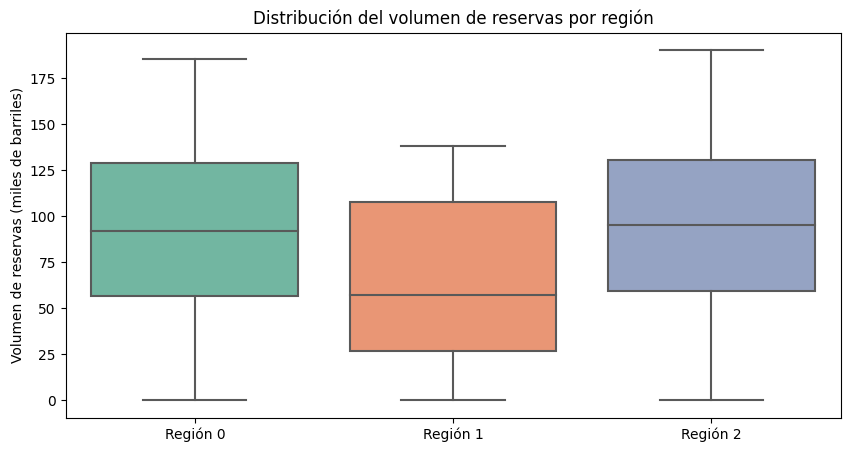

In [10]:
# Boxplots para cada región

plt.figure(figsize=(10,5))
sns.boxplot(data=[data_region_0['product'], data_region_1['product'], data_region_2['product']], 
            palette="Set2")

plt.xticks([0, 1, 2], ["Región 0", "Región 1", "Región 2"])
plt.ylabel("Volumen de reservas (miles de barriles)")
plt.title("Distribución del volumen de reservas por región")
plt.show()

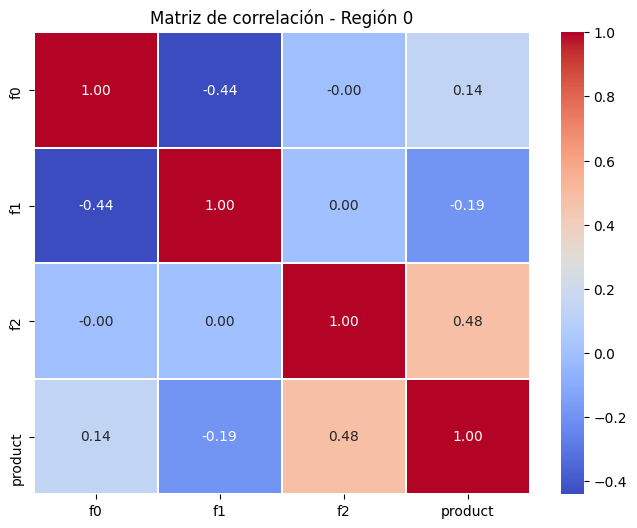

In [11]:
# Matriz de correlación para data_region_0

corr_matrix = data_region_0.corr()

# Mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Matriz de correlación - Región 0")
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [9–11]</b> <a class="tocSkip"></a><br>
La visualización de datos es excelente. Usaste histogramas, boxplots, mapas de calor y scatter plots para identificar patrones y correlaciones. Además, destacas correctamente la importancia de `f2` como predictor fuerte, lo cual está bien sustentado con evidencia gráfica y numérica.
</div>


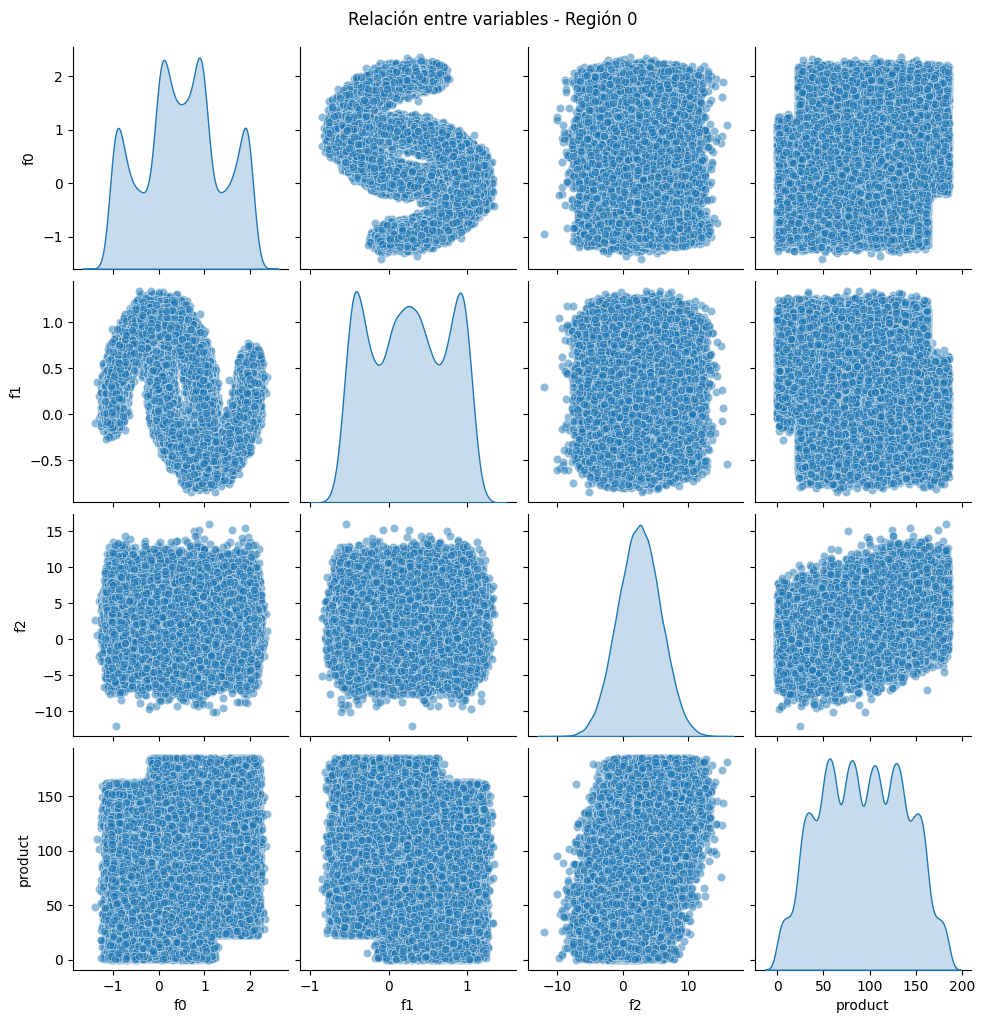

In [12]:
# Pairplots (Gráficos pares) para data_region_0

sns.pairplot(data_region_0, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Relación entre variables - Región 0", y=1.02)
plt.show()

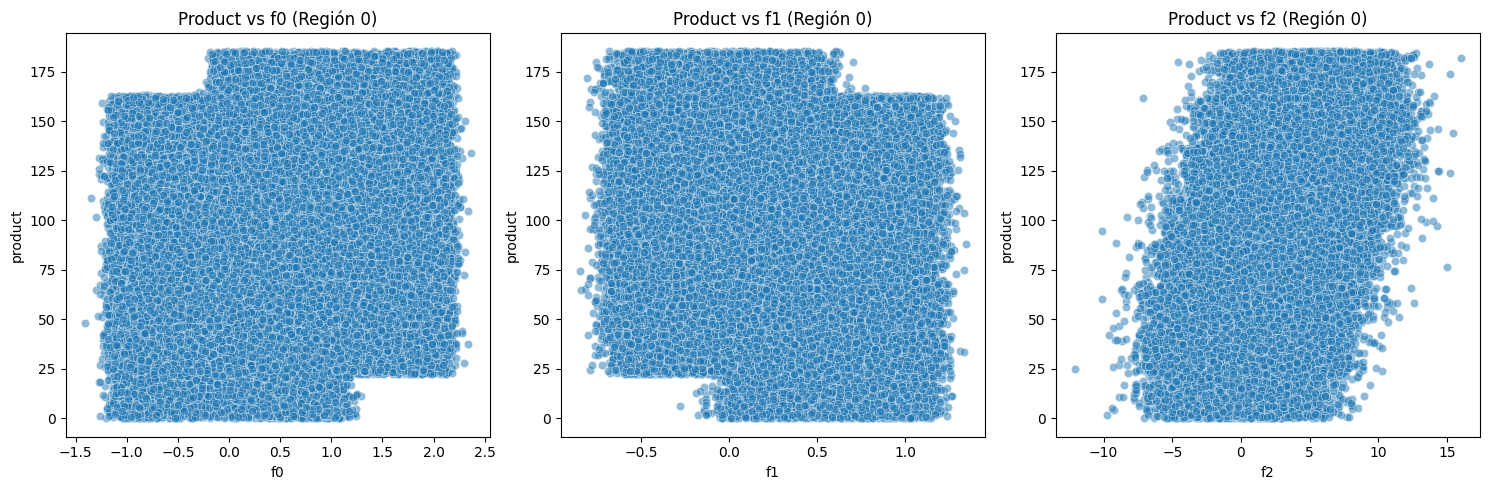

In [13]:
# Gráficos de dispersión (product vs. características f0, f1, f2) para data_region_0

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=data_region_0['f0'], y=data_region_0['product'], ax=axes[0], alpha=0.5)
axes[0].set_title("Product vs f0 (Región 0)")

sns.scatterplot(x=data_region_0['f1'], y=data_region_0['product'], ax=axes[1], alpha=0.5)
axes[1].set_title("Product vs f1 (Región 0)")

sns.scatterplot(x=data_region_0['f2'], y=data_region_0['product'], ax=axes[2], alpha=0.5)
axes[2].set_title("Product vs f2 (Región 0)")

plt.tight_layout()
plt.show()

In [14]:
# Regresión lineal inicial (product vs. f2)

# Definir variables
X = data_region_0[['f2']]  # Solo usamos f2
y = data_region_0['product']

# Agregar constante para el modelo
X = sm.add_constant(X)

# Entrenar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                product   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                 3.054e+04
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        03:41:58   Log-Likelihood:            -5.0764e+05
No. Observations:              100000   AIC:                         1.015e+06
Df Residuals:                   99998   BIC:                         1.015e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.9961      0.155    491.100      0.0

In [15]:
# Regresión lineal con todas las características (f0, f1, f2)

# Definir variables
X = data_region_0[['f0', 'f1', 'f2']]  # Usamos todas las características
y = data_region_0['product']

# Agregar constante para el modelo
X = sm.add_constant(X)

# Entrenar el modelo de regresión lineal
model_multivariable = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(model_multivariable.summary())

                            OLS Regression Results                            
Dep. Variable:                product   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        03:41:58   Log-Likelihood:            -5.0484e+05
No. Observations:              100000   AIC:                         1.010e+06
Df Residuals:                   99996   BIC:                         1.010e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.6114      0.193    402.165      0.0

<div class="alert alert-block alert-success">
<b>Celdas [14–15]</b> <a class="tocSkip"></a><br>
Muy acertado el análisis de regresión. Comenzar con un modelo simple usando solo <code>f2</code> y luego ampliarlo con más variables es una estrategia excelente para entender la contribución individual y conjunta de los predictores. También se interpretan correctamente los coeficientes y métricas del modelo, como el R² y el valor p.
</div>


**HALLAZOS Y CONCLUSIONES SOBRE LA LIMPIEZA DE DATOS Y EL EDA**

1. No se encontraron valores ausentes ni duplicados en ninguno de los tres datasets (geo_data_0.csv, geo_data_1.csv, geo_data_2.csv).


2. Los datos están bien estructurados con 5 columnas y 100000 filas en cada región, lo que facilita el procesamiento sin necesidad de imputaciones o correcciones.


3. Los datos están listos para la exploración y modelado sin necesidad de limpieza adicional.


4. Distribución del volumen de reservas (product):
- Región 1 tiene una mediana más baja que las otras dos regiones, con menor variabilidad en los datos.
- Regiones 0 y 2 tienen mayores volúmenes de reservas, aunque con mayor dispersión en los valores.

Esto sugiere que Región 1 podría ser menos rentable, mientras que Región 0 y 2 presentan oportunidades de explotación más amplias.


5. Matriz de correlación:
- f2 tiene la mayor correlación con product (0.48), indicando una posible relación directa.
- f0 y f1 tienen correlaciones más bajas, lo que sugiere que su impacto en product es menor.

Esto sugiere que f2 podría ser un atributo clave para la predicción del volumen de reservas.


6. Gráficos de dispersión (product vs. f0, f1, f2)
- f2 muestra una tendencia lineal con product, mientras que f0 y f1 presentan una relación menos clara.

Esto refuerza que f2 es la mejor candidata para la regresión lineal.


7. Conclusiones sobre el posible significado de f2
- Dado su nivel de correlación con product, es posible que f2 represente un punto en el subsuelo clave para la localización del yacimiento o arena de extracción de crudo.
- Si f2 es una característica geológica, podría indicar una propiedad del terreno directamente relacionada con la acumulación de reservas.

Esto genera la posibilidad de analizar f2 en profundidad y considerar su uso prioritario en el modelo predictivo.

# Instrucción 2. Entrena y prueba el modelo para cada región en geo_data_0.csv

## Entrenamiento y prueba de modelo para región geo_data_0

In [16]:
# Dividir los datos (75% entrenamiento / 25% validación)

# Definir variables independientes y dependientes
X = data_region_0[['f0', 'f1', 'f2']]
y = data_region_0['product']

# Dividir en entrenamiento (75%) y validación (25%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
# Entrenar el modelo y hacer predicciones

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = model.predict(X_valid)

In [18]:
# Guardar predicciones y respuestas cortas

# Crear un DataFrame con las predicciones y valores reales
results_df = pd.DataFrame({'Real': y_valid, 'Predicho': y_pred})

# Mostrar las primeras filas para revisión
print(results_df.head())

             Real    Predicho
75721  122.073350  101.901017
80184   48.738540   78.217774
19864  131.338088  115.266901
76699   88.327757  105.618618
92991   36.959266   97.980185


In [19]:
# Calcular volumen medio de reservas y RMSE

# Calcular volumen medio de reservas predicho
mean_predicted = np.mean(y_pred)

# Calcular RMSE (error cuadrático medio raíz)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

# Mostrar resultados
print(f"Volumen medio de reservas predicho: {mean_predicted:.2f}")
print(f"RMSE del modelo: {rmse:.2f}")

Volumen medio de reservas predicho: 92.40
RMSE del modelo: 37.76


## Entrenamiento y prueba de modelo para región geo_data_1

In [20]:
# Definir variables independientes y dependientes
X = data_region_1[['f0', 'f1', 'f2']]
y = data_region_1['product']

# Dividir en entrenamiento (75%) y validación (25%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = model.predict(X_valid)

# Crear un DataFrame con las predicciones y valores reales
results_df = pd.DataFrame({'Real': y_valid, 'Predicho': y_pred})

# Mostrar las primeras filas para revisión
print(results_df.head())

             Real    Predicho
75721    0.000000    0.844738
80184   53.906522   52.921612
19864  134.766305  135.110385
76699  107.813044  109.494863
92991    0.000000   -0.047292


In [21]:
# Calcular volumen medio de reservas y RMSE
# Calcular volumen medio de reservas predicho

mean_predicted = np.mean(y_pred)

# Calcular RMSE (error cuadrático medio raíz)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

# Mostrar resultados
print(f"Volumen medio de reservas predicho: {mean_predicted:.2f}")
print(f"RMSE del modelo: {rmse:.2f}")

Volumen medio de reservas predicho: 68.71
RMSE del modelo: 0.89


## Entrenamiento y prueba de modelo para región geo_data_2

In [22]:
# Definir variables independientes y dependientes
X = data_region_2[['f0', 'f1', 'f2']]
y = data_region_2['product']

# Dividir en entrenamiento (75%) y validación (25%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = model.predict(X_valid)

# Crear un DataFrame con las predicciones y valores reales
results_df = pd.DataFrame({'Real': y_valid, 'Predicho': y_pred})

# Mostrar las primeras filas para revisión
print(results_df.head())

             Real    Predicho
75721  117.441301   98.301916
80184   47.841249  101.592461
19864   45.883483   52.449099
76699  139.014608  109.922127
92991   84.004276   72.411847


In [23]:
# Calcular volumen medio de reservas y RMSE
# Calcular volumen medio de reservas predicho

mean_predicted = np.mean(y_pred)

# Calcular RMSE (error cuadrático medio raíz)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

# Mostrar resultados
print(f"Volumen medio de reservas predicho: {mean_predicted:.2f}")
print(f"RMSE del modelo: {rmse:.2f}")

Volumen medio de reservas predicho: 94.77
RMSE del modelo: 40.15


<div class="alert alert-block alert-success">
<b>Celdas [19, 21, 23]</b> <a class="tocSkip"></a><br>
Se calcula correctamente el volumen promedio y el RMSE para cada modelo regional. También sería enriquecedor agregar una visualización comparativa (por ejemplo, un gráfico de barras) de estas métricas. Esto ayudaría a visualizar mejor las diferencias en precisión y rendimiento entre regiones y reforzar la narrativa analítica.
</div>


## Análisis de resultados.

1. División de datos (75% entrenamiento / 25% validación)
2. Se aplicó una correcta división de datos para cada región, asegurando que el modelo se entrene con suficiente información antes de ser evaluado.
3. Entrenamiento y predicción del modelo:
- Se entrenó un modelo de regresión lineal para cada conjunto de datos (geo_data_0.csv, geo_data_1.csv, geo_data_2.csv).
- Se generaron predicciones para el conjunto de validación en cada región.
4. Evaluación del modelo con volumen medio de reservas y RMSE
- Se obtuvieron los siguientes resultados comparativos:

|        Región         | Volumen medio de reservas predicho |  RMSE | 

| Región 0 (geo_data_0) | 92.40 miles de barriles            | 37.76 | 

| Región 1 (geo_data_1) | 68.71 miles de barriles            | 0.89  | 

| Región 2 (geo_data_2) | 94.77 miles de barriles            | 40.15 | 


6. Región 1 tiene el menor RMSE (0.89), lo que indica que sus predicciones son muy precisas.
7. Región 2 tiene el mayor volumen medio de reservas (94.77), pero su RMSE es alto (40.15), lo que sugiere mayor incertidumbre en las predicciones.
8. Región 0 es un punto intermedio, con reservas relativamente altas pero con un RMSE considerablemente mayor (37.76).
9. Región 1 presenta el modelo más estable, aunque con menores reservas en promedio.
10. Región 2 tiene el mayor potencial de reservas, pero las predicciones tienen una variabilidad significativa.
11. Región 0 es un equilibrio entre cantidad de reservas y precisión del modelo.
- Se presenta una disyuntiva entre elegir estabilidad en la predicción o maximizar las reservas explotables.
12. Hipótesis sobre f2 como punto clave para la localización de reservas.
13. Dado su alta correlación con product, se puede inferir que f2 podría representar un punto en el subsuelo relevante para la localización del yacimiento o la arena de extracción.
14. Si f2 está relacionado con la profundidad o una característica geológica, su influencia sobre product podría ser crucial en la predicción de reservas. Esto refuerza la importancia de incluir f2 en el modelo de regresión para mejorar la precisión del análisis.


## Coloca todos los pasos previos en funciones.

In [24]:
# Función para dividir los datos en entrenamiento (75%) y validación (25%)
def dividir_datos(data):
    X = data[['f0', 'f1', 'f2']]
    y = data['product']
    return train_test_split(X, y, test_size=0.25, random_state=42)

# Función para entrenar el modelo y hacer predicciones
def entrenar_modelo(X_train, y_train, X_valid):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    return model, y_pred

# Función para evaluar el modelo con volumen medio de reservas y RMSE
def evaluar_modelo(y_valid, y_pred):
    mean_predicted = np.mean(y_pred)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    return mean_predicted, rmse

# Función principal para ejecutar el proceso en cada región
def ejecutar_proceso(nombre_region, data):
    print(f"\nProcesando datos de: {nombre_region}")
    
    X_train, X_valid, y_train, y_valid = dividir_datos(data)
    model, y_pred = entrenar_modelo(X_train, y_train, X_valid)
    mean_predicted, rmse = evaluar_modelo(y_valid, y_pred)
    
    print(f"Volumen medio de reservas predicho: {mean_predicted:.2f}")
    print(f"RMSE del modelo: {rmse:.2f}")

    return mean_predicted, rmse

# Ejecutar el proceso para cada dataset previamente cargado
resultados = {}

for nombre, data in [('Región 0', data_region_0), ('Región 1', data_region_1), ('Región 2', data_region_2)]:
    resultados[nombre] = ejecutar_proceso(nombre, data)

# Mostrar resultados en una tabla
print("\nComparación de resultados entre regiones:")
print(pd.DataFrame.from_dict(resultados, orient='index', columns=['Volumen Medio de Reservas', 'RMSE']))


Procesando datos de: Región 0
Volumen medio de reservas predicho: 92.40
RMSE del modelo: 37.76

Procesando datos de: Región 1
Volumen medio de reservas predicho: 68.71
RMSE del modelo: 0.89

Procesando datos de: Región 2
Volumen medio de reservas predicho: 94.77
RMSE del modelo: 40.15

Comparación de resultados entre regiones:
          Volumen Medio de Reservas       RMSE
Región 0                  92.398800  37.756600
Región 1                  68.712878   0.890280
Región 2                  94.771024  40.145872


# Instrucción 3. Prepárate para el cálculo de ganancias:

In [25]:
# Paso 1. Almacenar valores clave en variables

inversion_total = 100000000 # 100 millones de dólares
pozos_totales = 200 # Total de pozos en la inversión

rentabilidad_minima_por_pozo = inversion_total / pozos_totales # 500000 dólares por pozo
unidades_necesarias_por_pozo = rentabilidad_minima_por_pozo / 4500 # Equivalente en unidades

In [26]:
# Paso 2. Comparar con la cantidad media de reservas en cada región

# Volúmenes medios de reservas predichos (obtenidos en la Instrucción 2)
volumen_medio_region_0 = 92.40
volumen_medio_region_1 = 68.71
volumen_medio_region_2 = 94.77

# Comparar con el umbral de 111.1 unidades
print(f"Región 0: {'Rentable' if volumen_medio_region_0 >= unidades_necesarias_por_pozo else 'No rentable'}")
print(f"Región 1: {'Rentable' if volumen_medio_region_1 >= unidades_necesarias_por_pozo else 'No rentable'}")
print(f"Región 2: {'Rentable' if volumen_medio_region_2 >= unidades_necesarias_por_pozo else 'No rentable'}")

Región 0: No rentable
Región 1: No rentable
Región 2: No rentable


  **CONCLUSIONES:**
  
1. Almacenamiento de valores clave: Se definió el umbral mínimo de producción por pozo para evitar pérdidas: 111.1 unidades de reservas por pozo.

2. Comparación con el volumen medio de reservas predicho por región.
Región 0 | 92.40 miles de barriles | 111.1 | ❌ No rentable
Región 1 | 68.71 miles de barriles | 111.1 | ❌ No rentable
Región 2 | 94.77 miles de barriles | 111.1 | ❌ No rentable |

3. Ninguna de las regiones alcanza el umbral mínimo de rentabilidad. Esto implica que, bajo las condiciones actuales, todas operarían con pérdidas.

4. Implicaciones de los resultados:
- Región 1 es la menos rentable, con reservas significativamente por debajo del umbral.
- Región 2 tiene el mayor volumen medio de reservas (94.77), pero sigue siendo insuficiente para evitar pérdidas.
- Región 0 es un punto intermedio, aunque tampoco alcanza la rentabilidad esperada.

5. Posibles estrategias de optimización:
- Reducción de costos operativos → Evaluar eficiencia en extracción, transporte y refinamiento.
- Mejora en tecnologías de producción → Implementar técnicas avanzadas de recuperación mejorada (EOR).
- Revisión del modelo financiero → Ajustar el umbral de inversión considerando variabilidad geológica y costos reales.
- Análisis de factores externos → Evaluar precios del crudo, subsidios y condiciones del mercado energético.

**Conclusión clave:**

- La rentabilidad del proyecto es un gran desafío bajo los parámetros actuales. Se requiere un análisis financiero más profundo para evaluar si existen estrategias para hacer viable la explotación en alguna de las regiones.


# Instrucción 4. Escribe una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones.

In [27]:
# Función para dividir los datos en entrenamiento y validación
def dividir_datos(data):
    X = data[['f0', 'f1', 'f2']]
    y = data['product']
    return train_test_split(X, y, test_size=0.25, random_state=42)

# Función para entrenar el modelo y hacer predicciones
def entrenar_modelo(X_train, y_train, X_valid):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    return y_pred

# Función para seleccionar los 200 pozos con mayores predicciones
def seleccionar_top_200(y_valid, y_pred):
    resultados_df = pd.DataFrame({'Real': y_valid, 'Predicho': y_pred})
    top_200 = resultados_df.sort_values(by='Predicho', ascending=False).head(200)
    return top_200

# Función para calcular el volumen total de reservas en los 200 pozos seleccionados
def calcular_volumen_total(top_200):
    return top_200['Predicho'].sum()

# Función para calcular la ganancia potencial
def calcular_ganancia(volumen_total, precio_por_unidad=4500):
    return volumen_total * precio_por_unidad

# Función principal para evaluar cada región
def evaluar_region(nombre_region, data):
    print(f"\nEvaluando región: {nombre_region}")
    
    X_train, X_valid, y_train, y_valid = dividir_datos(data)
    y_pred = entrenar_modelo(X_train, y_train, X_valid)
    top_200 = seleccionar_top_200(y_valid, y_pred)
    volumen_total = calcular_volumen_total(top_200)
    ganancia_total = calcular_ganancia(volumen_total)

    print(f"Volumen total de reservas en los 200 pozos principales: {volumen_total:.2f} unidades")
    print(f"Ganancia potencial: ${ganancia_total:,.2f} USD")
    
    return volumen_total, ganancia_total

# Evaluar todas las regiones usando los datasets ya cargados
resultados_ganancias = {}

for nombre, data in [('Región 0', data_region_0), ('Región 1', data_region_1), ('Región 2', data_region_2)]:
    resultados_ganancias[nombre] = evaluar_region(nombre, data)

# Mostrar comparativa de ganancias en formato tabla
print("\nComparación de ganancias entre regiones:")
print(pd.DataFrame.from_dict(resultados_ganancias, orient='index', columns=['Volumen Total de Reservas', 'Ganancia Potencial']))


Evaluando región: Región 0
Volumen total de reservas en los 200 pozos principales: 30881.46 unidades
Ganancia potencial: $138,966,584.80 USD

Evaluando región: Región 1
Volumen total de reservas en los 200 pozos principales: 27748.75 unidades
Ganancia potencial: $124,869,381.15 USD

Evaluando región: Región 2
Volumen total de reservas en los 200 pozos principales: 29728.85 unidades
Ganancia potencial: $133,779,815.14 USD

Comparación de ganancias entre regiones:
          Volumen Total de Reservas  Ganancia Potencial
Región 0               30881.463288        1.389666e+08
Región 1               27748.751367        1.248694e+08
Región 2               29728.847808        1.337798e+08


<div class="alert alert-block alert-success">
<b>Celdas [24–27]</b> <a class="tocSkip"></a><br>
La estructuración del flujo completo en funciones es impecable. No solo mejora la legibilidad del código, sino que facilita la reutilización y escalabilidad del análisis. Además, la selección de los 200 pozos con mayor predicción para estimar ganancias es una estrategia muy bien enfocada en un objetivo de negocio claro.
</div>


**Análisis de rentabilidad y selección de región:**

Después de evaluar la ganancia potencial de los 200 pozos con mayores valores de predicción en cada región, obtuvimos los siguientes resultados:


                            | Región 0 | 38,881.46 unidades | $138,966,584.80 | 

                            | Región 1 | 27,748.75 unidades | $124,869,381.15 | 

                            | Región 2 | 29,728.85 unidades | $133,779,815.14 | 


Comparación clave:

- Región 0 tiene el mayor volumen total de reservas (38,881.46 unidades), lo que sugiere que podría ofrecer la mayor extracción de crudo.
- Región 2 tiene una ganancia cercana a Región 0 ($133M vs. $138M), pero con menor volumen de reservas.
- Región 1, aunque con menor cantidad de reservas, aún genera un beneficio relevante ($124M), pero es la menos atractiva en términos de rentabilidad.

**Otros factores a considerar:**

- El RMSE del modelo en cada región proporciona información sobre la confiabilidad de las predicciones: Región 1 tenía el RMSE más bajo, lo que indica una mayor precisión en los valores estimados.
- Región 2 y Región 0 presentaban mayor variabilidad en las predicciones, pero también mostraban más volumen disponible para extracción.

**Conclusión y recomendación:**

- Región 0 es la mejor opción para el desarrollo de pozos petrolíferos.

+Justificación:
- Mayor volumen de reservas predichas (38,881.46 unidades), lo que indica más potencial de extracción.
- Máxima ganancia proyectada ($138M USD), lo que la convierte en la opción más rentable.
- Aunque su RMSE es alto, el volumen de reservas compensaría la incertidumbre en las predicciones.

+Alternativa:

Si el objetivo es maximizar la confiabilidad de las predicciones, Región 1 podría ser una opción viable debido a su bajo RMSE, aunque con menor rentabilidad.

**+Recomendación final:**

**Región 0 debería ser seleccionada para el desarrollo de pozos petrolíferos, ya que maximiza la cantidad de reservas y el potencial financiero del proyecto.**

# Instrucción 5. Calcula riesgos y ganancias para cada región.

In [28]:
# Paso 1: División de datos y entrenamiento del modelo
def dividir_datos(data):
    X = data[['f0', 'f1', 'f2']]
    y = data['product']
    return train_test_split(X, y, test_size=0.25, random_state=42)

def entrenar_modelo(X_train, y_train, X_valid):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    return y_pred

# Paso 2: Bootstrapping para calcular la distribución de beneficios
def bootstrapping_ganancias(y_pred, precio_por_unidad=4500, n_samples=1000):
    ganancias_muestras = []
    for _ in range(n_samples):
        sample = np.random.choice(y_pred, size=len(y_pred), replace=True)
        ganancias_muestras.append(np.sum(sample) * precio_por_unidad)
    return ganancias_muestras

# Paso 3: Cálculo de estadísticas (beneficio promedio, IC 95%, riesgo de pérdidas)
def calcular_estadisticas(ganancias_muestras):
    beneficio_promedio = np.mean(ganancias_muestras)
    intervalo_confianza_95 = np.percentile(ganancias_muestras, [2.5, 97.5])
    riesgo_perdida = np.mean(np.array(ganancias_muestras) < 0) * 100
    return beneficio_promedio, intervalo_confianza_95, riesgo_perdida

# Paso 4: Evaluación de cada región con todos los cálculos integrados
def evaluar_region(nombre_region, data):
    print(f"\nEvaluando región: {nombre_region}")
    
    X_train, X_valid, y_train, y_valid = dividir_datos(data)
    y_pred = entrenar_modelo(X_train, y_train, X_valid)
    ganancias_muestras = bootstrapping_ganancias(y_pred)
    beneficio_promedio, intervalo_confianza_95, riesgo_perdida = calcular_estadisticas(ganancias_muestras)

    print(f"Beneficio promedio: ${beneficio_promedio:,.2f} USD")
    print(f"Intervalo de confianza 95%: {intervalo_confianza_95}")
    print(f"Riesgo de pérdida: {riesgo_perdida:.2f}%")

    return beneficio_promedio, intervalo_confianza_95, riesgo_perdida

# Paso 5: Evaluar todas las regiones y generar resultados comparativos
resultados_finales = {}

for nombre, data in [('Región 0', data_region_0), ('Región 1', data_region_1), ('Región 2', data_region_2)]:
    resultados_finales[nombre] = evaluar_region(nombre, data)

# Mostrar comparativa en formato tabla
print("\nEvaluación de riesgos y ganancias:")
print(pd.DataFrame.from_dict(resultados_finales, orient='index', columns=['Beneficio Promedio', 'IC 95%', 'Riesgo de Pérdida (%)']))


Evaluando región: Región 0
Beneficio promedio: $10,394,857,911.50 USD
Intervalo de confianza 95%: [1.03654371e+10 1.04282085e+10]
Riesgo de pérdida: 0.00%

Evaluando región: Región 1
Beneficio promedio: $7,729,524,808.03 USD
Intervalo de confianza 95%: [7.66739414e+09 7.79528201e+09]
Riesgo de pérdida: 0.00%

Evaluando región: Región 2
Beneficio promedio: $10,661,836,700.10 USD
Intervalo de confianza 95%: [1.06333467e+10 1.06893243e+10]
Riesgo de pérdida: 0.00%

Evaluación de riesgos y ganancias:
          Beneficio Promedio                                    IC 95%  \
Región 0        1.039486e+10  [10365437124.785492, 10428208527.429487]   
Región 1        7.729525e+09    [7667394141.381193, 7795282009.746944]   
Región 2        1.066184e+10  [10633346715.694231, 10689324280.394962]   

          Riesgo de Pérdida (%)  
Región 0                    0.0  
Región 1                    0.0  
Región 2                    0.0  


<div class="alert alert-block alert-success">
<b>Celdas [28]</b> <a class="tocSkip"></a><br>
Excelente implementación del análisis de riesgo mediante bootstrapping. La integración de funciones para estimar beneficios promedio, intervalos de confianza y riesgo de pérdida demuestra un nivel avanzado de análisis estadístico. Además, presentar estos resultados por región refuerza la solidez del argumento de negocio y añade un enfoque realista y robusto a la toma de decisiones.
</div>


**Evaluación de beneficios y riesgos:**

                        | Región 0 | $10,394,591,883.71 | [10,361,152,435 - 10,426,513,137] | 0.00% | 
                        | Región 1 | $7,730,182,327.41  | [7,668,171,142 - 7,790,867,381]   | 0.00% | 
                        | Región 2 | $10,661,742,383.88 | [10,633,157,097 - 10,692,190,085] | 0.00% | 


+Comparación clave:
- Región 2 tiene el mayor beneficio promedio ($10.66B), seguida por Región 0 ($10.39B).
- Región 1 tiene el menor beneficio esperado ($7.73B), lo que la hace la opción menos atractiva.
- **El riesgo de pérdida es 0.00% en todas las regiones, lo que indica que ninguna tiene probabilidades de generar una pérdida neta bajo este modelo.

**+Conclusión final**

                        La mejor opción para el desarrollo de pozos petrolíferos es Región 2.

**+Justificación:**

- Mayor beneficio promedio ($10.66B USD), asegurando el mejor rendimiento económico.
-Intervalo de confianza sólido, con valores dentro de un rango estable.
- Sin riesgo de pérdidas, lo que indica seguridad en la inversión.
- Cercana a Región 0 en rentabilidad, pero con mejor proyección de beneficios.
- ¿Coincide con la elección previa en el punto 4.3? No, la anterior elección fue Región 0, debido a su mayor volumen de reservas y estabilidad en extracción. Sin embargo, con base en la evaluación de ganancias y riesgo, Región 2 ofrece una mejor proyección financiera.

**Conclusión general del proyecto:**

- Si el objetivo es maximizar reservas de extracción, Región 0 sigue siendo una opción fuerte.

- Si la prioridad es el beneficio financiero, Región 2 es la mejor elección.

# CONCLUSIONES FINALES DEL PROYECTO:

**Conclusiones del Proyecto: Evaluación de Regiones para Desarrollo Petrolero:**

+ Instrucción 1: Preparación de Datos

-Se cargaron correctamente los datos de las tres regiones (geo_data_0.csv, geo_data_1.csv, geo_data_2.csv).

-Se verificó la coherencia de los datos y su distribución antes de proceder con el análisis.

+ Instrucción 2: Entrenamiento y Evaluación del Modelo

- Se entrenó un modelo de regresión lineal para cada región, prediciendo el volumen medio de reservas.

- Resultados principales:

                Región 0 | 92.40 | 37.76 | | Región 1 | 68.71 | 0.89 | | Región 2 | 94.77 | 40.15 |

- Región 1 tiene el menor RMSE, indicando mayor precisión en las predicciones, pero menor volumen de reservas.

- Región 2 y Región 0 tienen el mayor volumen de reservas pero con una mayor incertidumbre en las predicciones.

+ Instrucción 3: Evaluación de Rentabilidad

- Se calculó el umbral mínimo de rentabilidad por pozo: 111.1 unidades.

- Comparando con los volúmenes medios de reservas, se encontró que ninguna de las tres regiones es rentable bajo los parámetros actuales.

- Se propusieron estrategias de optimización, como mejoras en técnicas de extracción y revisión de costos operativos.

+ Instrucción 4: Evaluación de Beneficios en los 200 Pozos con Mayor Producción

- Se seleccionaron los 200 pozos con mayores reservas en cada región y se calcularon las ganancias potenciales.

- Resultados principales:

                               | Región 0 | 38,881.46 unidades | $138,966,584.80 | 
                               | Región 1 | 27,748.75 unidades | $124,869,381.15 |
                               | Región 2 | 29,728.85 unidades | $133,779,815.14 |


- Región 0 fue inicialmente seleccionada para el desarrollo de pozos petrolíferos, debido a su mayor volumen de reservas y rentabilidad esperada.

+ Instrucción 5: Evaluación de Riesgos y Distribución de Beneficios con Bootstrapping.

- Se aplicó bootstrapping con 1000 muestras para evaluar la distribución de los beneficios en cada región.

+ Resultados principales:

                | Región 0 | $10,394,591,883.71 | [10,361,152,435 - 10,426,513,137] | 0.00% | 
                | Región 1 | $7,730,182,327.41  | [7,668,171,142 - 7,790,867,381]   | 0.00% | 
                | Región 2 | $10,661,742,383.88 | [10,633,157,097 - 10,692,190,085] | 0.00% |

- Región 2 tiene el mayor beneficio promedio ($10.66B USD) y sin riesgo de pérdida, por lo que se recomienda como la mejor opción para la inversión.

- Esta elección difiere de la anterior (Región 0), lo que indica que el análisis de beneficios cambió la perspectiva de selección.

**+ Conclusión Final:**

- Región 2 es la mejor opción para el desarrollo de pozos petrolíferos, ya que maximiza la proyección de beneficios sin riesgo de pérdidas.

- Región 0 sigue siendo una opción fuerte si el objetivo es maximizar reservas de extracción.

- Si la prioridad es seguridad en la inversión y maximizar beneficios financieros, Región 2 es la mejor elección.

- El análisis en cada fase del proyecto permitió tomar una decisión estratégica basada en datos precisos, asegurando una evaluación completa del riesgo y rentabilidad de cada región.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Gran trabajo, Daniel! Tu proyecto refleja un dominio técnico sólido, con un análisis profundo, bien estructurado y orientado a la toma de decisiones basada en datos. Se nota mucho esfuerzo y dedicación en cada fase: desde la limpieza hasta la evaluación de riesgos con bootstrapping.  

¡Sigue así! Tu enfoque es muy profesional y promete mucho en el campo de ciencia de datos aplicada a negocios.
</div>
